In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
data_nueva = pd.read_csv("C:/Users/jcama/Desktop/data/Laptop_price.csv") 

#data = pd.read_csv("../Proyecto_Machine_Learning/Laptop_price.csv")
 
print(data_nueva.head())
print(data_nueva.shape)

    Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight  \
0    Asus         3.830296        16               512    11.185147  2.641094   
1    Acer         2.912833         4              1000    11.311372  3.260012   
2  Lenovo         3.241627         4               256    11.853023  2.029061   
3    Acer         3.806248        16               512    12.280360  4.573865   
4    Acer         3.268097        32              1000    14.990877  4.193472   

          Price  
0  17395.093065  
1  31607.605919  
2   9291.023542  
3  17436.728334  
4  32917.990718  
(1000, 7)


EDA

In [9]:
data_nueva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [10]:
#Contar la cantidad de memoria ram comprada segun su tamaño
memoria_ram = data_nueva['RAM_Size'].value_counts()
memoria_ram

RAM_Size
32    274
8     246
4     243
16    237
Name: count, dtype: int64

In [11]:
#comprar la cantidad de disco duro segun su tamaño
disco_duro = data_nueva['Storage_Capacity'].value_counts()
disco_duro

Storage_Capacity
256     357
1000    336
512     307
Name: count, dtype: int64

In [12]:
#Contar la cantidad de marcas de laptop
marcas = data_nueva['Brand'].value_counts()
marcas

Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64

In [13]:
#MOSTRAR EL PROMEDIO DE LA CAPACIDAD DE DISCO DURO POR MARCAS
average_storage_by_brand = data.groupby('Brand')['Storage_Capacity'].mean().sort_values()
average_storage_by_brand

Brand
Dell      558.552381
HP        578.652632
Asus      593.980583
Lenovo    596.126316
Acer      596.627451
Name: Storage_Capacity, dtype: float64

In [14]:
#MOSTRAR EL PROMEDIO DEL PRECIO DE LAPTOPS POR MARCAS
average_price_by_brand = data.groupby('Brand')['Price'].mean().sort_values() 
average_price_by_brand

Brand
Dell      18866.009978
HP        19369.762930
Asus      19854.238277
Lenovo    19974.929725
Acer      19984.613620
Name: Price, dtype: float64

In [15]:
#MOSTRAR AGRUPACION DE DATA
grouped_data = data.groupby(['Brand', 'RAM_Size']).size().reset_index(name='Count')
grouped_data

,Brand,RAM_Size,Count
0,Acer,4,50
1,Acer,8,48
2,Acer,16,47
3,Acer,32,59
4,Asus,4,47
5,Asus,8,66
6,Asus,16,47
7,Asus,32,46
8,Dell,4,48
9,Dell,8,43


In [16]:
#MOSTRAR DISTRIBUCION DE LA RAM SEGUN SU MARCA
ram_distribution = data.groupby(['Brand', 'RAM_Size']).size().unstack(fill_value=0)
ram_distribution

RAM_Size,4,8,16,32
Brand,,,,
Acer,50,48,47,59
Asus,47,66,47,46
Dell,48,43,52,67
HP,59,38,49,44
Lenovo,39,51,42,58


In [17]:
#Verificar si hay valores nulos en data
data_nueva.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [18]:
data_nueva.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


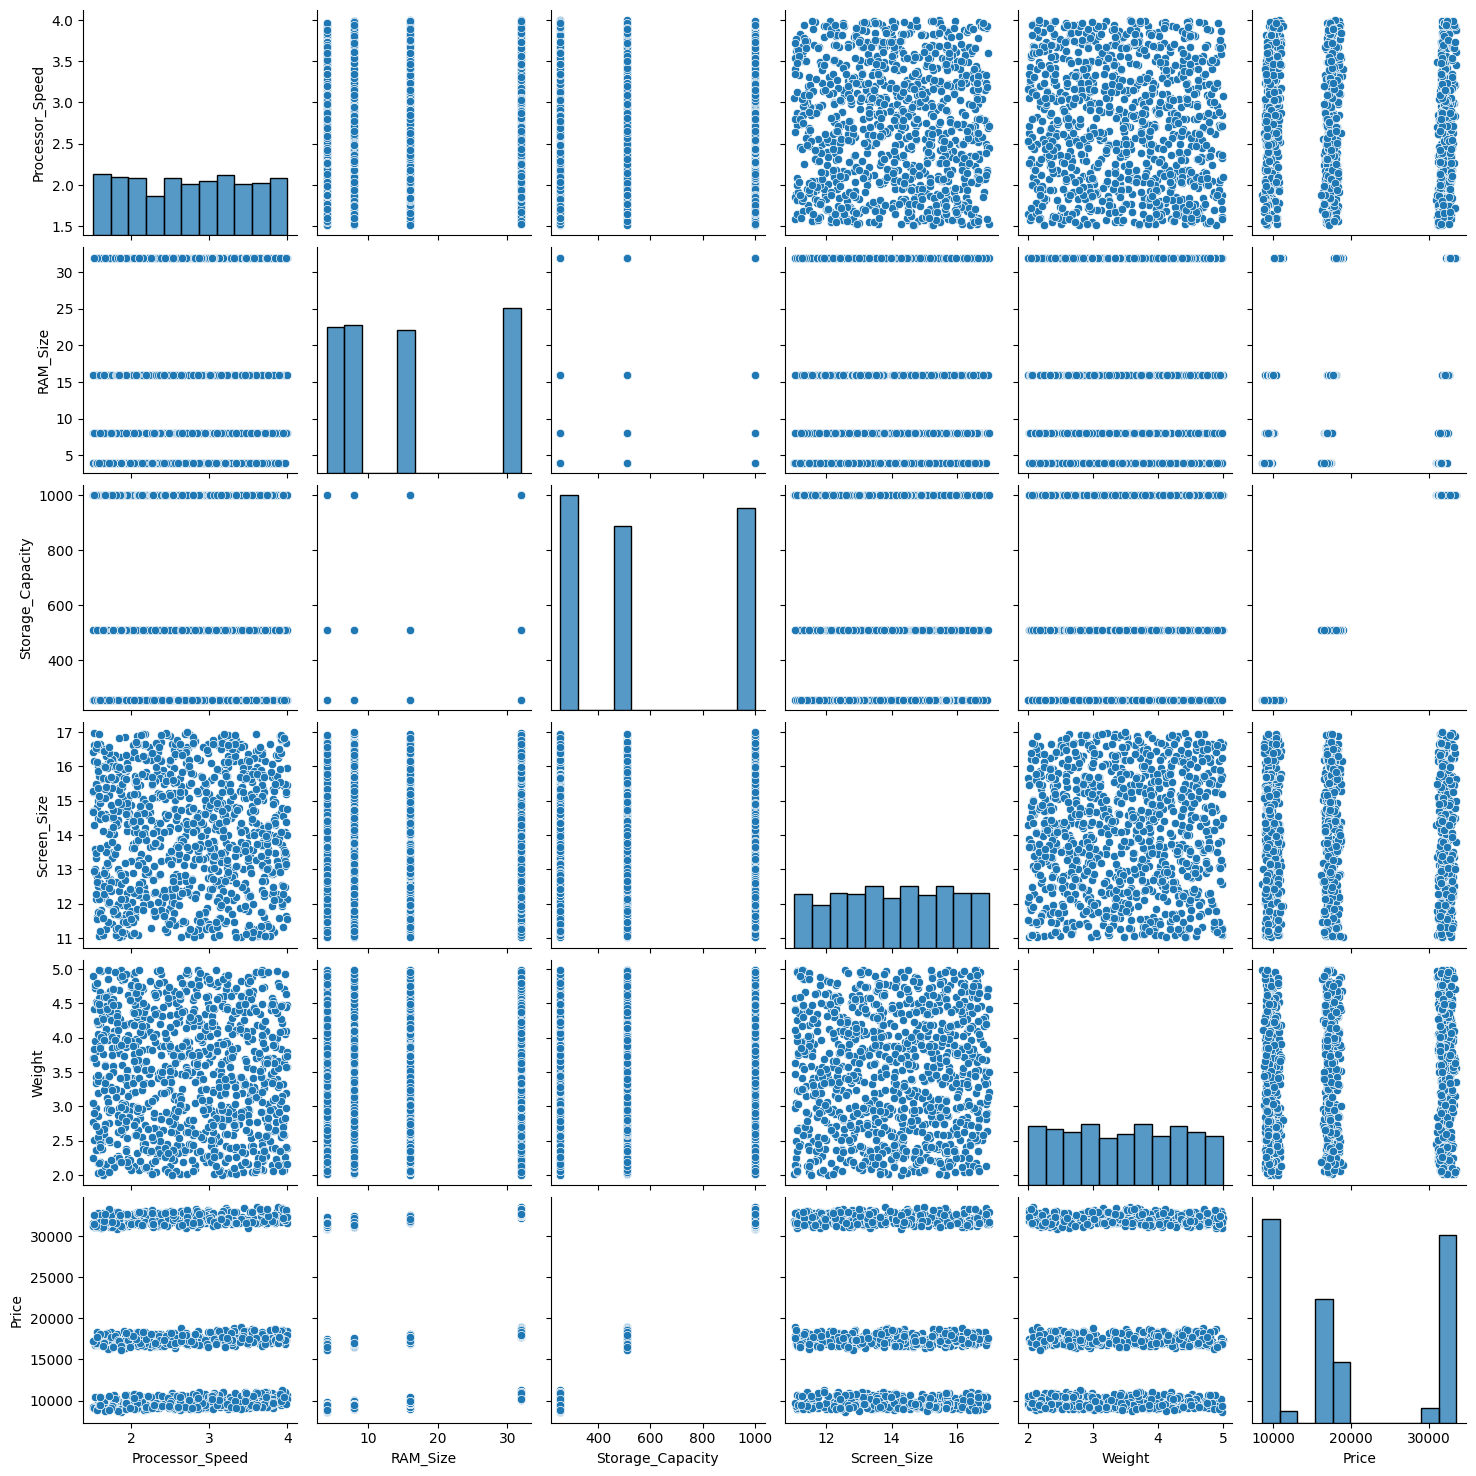

In [19]:
#Ploteo de la data
sns.pairplot(data_nueva)

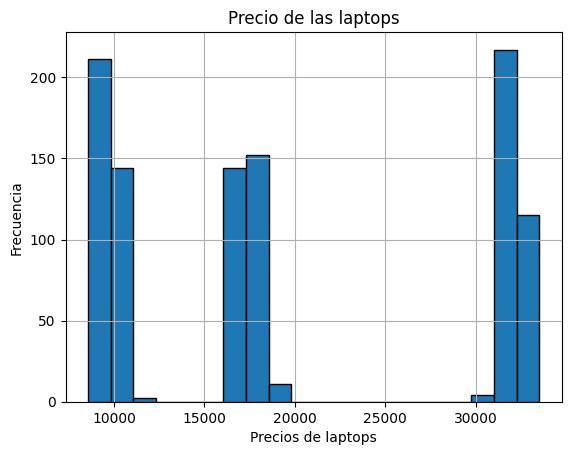

In [20]:
#Grafica para los precios de las laptops
data_nueva['Price'].hist(bins=20, edgecolor='black')
plt.title('Precio de las laptops')
plt.xlabel('Precios de laptops')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\jcama\AppData\Local\Temp\ipykernel_29648\4085537380.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=i, y=marcas[i], s=marcas[i], ha='center', va='bottom')


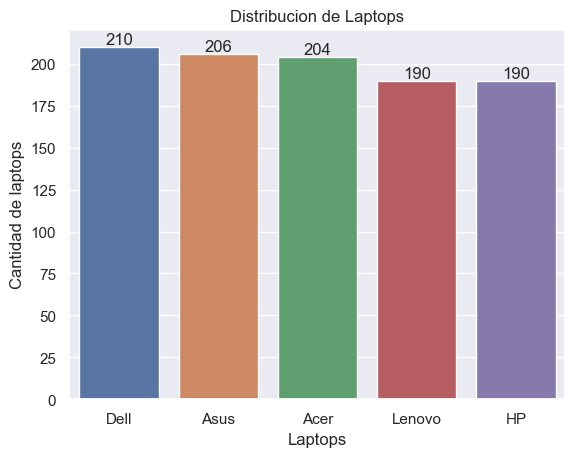

In [21]:
#Grafica para las marcas de laptop
sns.set_theme(style='darkgrid')
sns.barplot(x=marcas.index, y=marcas.values, palette='deep', hue=marcas.index)

for i in range(len(marcas)):
    plt.text(x=i, y=marcas[i], s=marcas[i], ha='center', va='bottom')

plt.title('Distribucion de Laptops')
plt.xlabel('Laptops')
plt.ylabel('Cantidad de laptops')
#plt.legend(loc='center', bbox_to_anchor=(1.12,0.5))
plt.show()

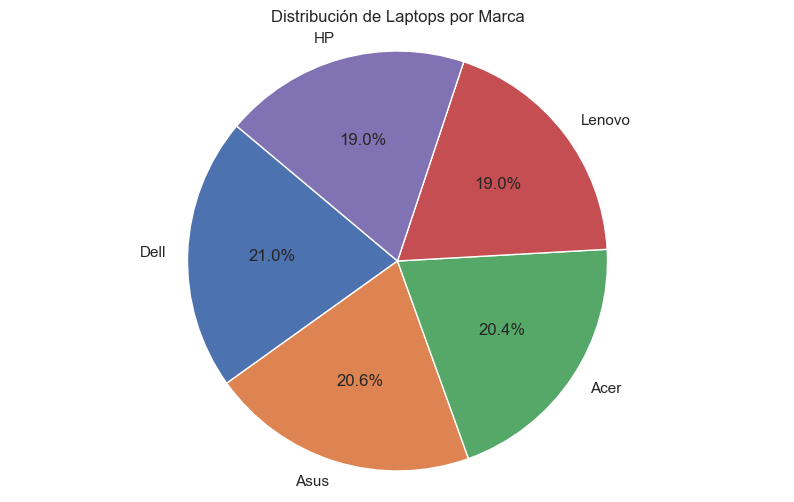

In [22]:
#Grafica para las marcas de laptop USANDO PIE
plt.figure(figsize=(10, 6))  
plt.pie(marcas, labels=marcas.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Distribución de Laptops por Marca')
plt.show()

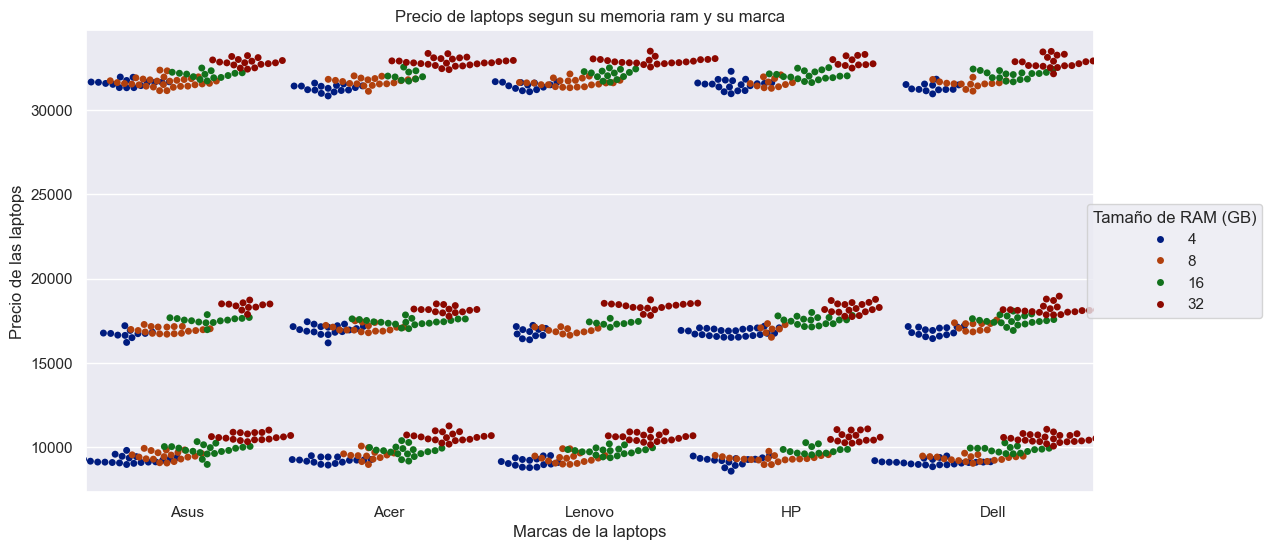

In [23]:
#GRAFICA DE PRECIO DE LAPTOP POR MEMORIA RAM 
#sns.displot(data=data_nueva, x='Price',hue='RAM_Size', kind='kde', legend=True, palette='dark', fill=True,col='RAM_Size')
plt.figure(figsize=(13,6))
sns.swarmplot(data=data_nueva, x='Brand', y='Price', hue='RAM_Size',  palette='dark', dodge=True)
plt.title('Precio de laptops segun su memoria ram y su marca')
plt.xlabel('Marcas de la laptops')
plt.ylabel('Precio de las laptops')
plt.legend(title='Tamaño de RAM (GB)',loc='center', bbox_to_anchor=(1.08,0.5))
plt.show()

In [24]:
precio = data_nueva[(data_nueva['Brand']=='Lenovo') & (data_nueva['Price']>30000)]
precio

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
25,Lenovo,1.511580,8,1000,15.237159,2.778165,31623.814230
30,Lenovo,2.365865,32,1000,13.893586,3.879371,32817.516577
36,Lenovo,1.852143,32,1000,16.276046,4.277261,32801.646280
54,Lenovo,1.667691,8,1000,12.148566,4.408554,31612.051968
90,Lenovo,3.131865,16,1000,11.444253,3.934584,31996.360217
...,...,...,...,...,...,...,...
943,Lenovo,2.535324,16,1000,15.608769,2.736652,32511.825419
958,Lenovo,3.939684,8,1000,12.265317,2.603791,32150.732029
980,Lenovo,3.220337,4,1000,14.392520,3.292575,31665.884014
985,Lenovo,3.754405,16,1000,13.043269,4.957305,32427.605391


In [25]:
precio['RAM_Size'].value_counts()

RAM_Size
8     22
32    21
16    14
4     13
Name: count, dtype: int64

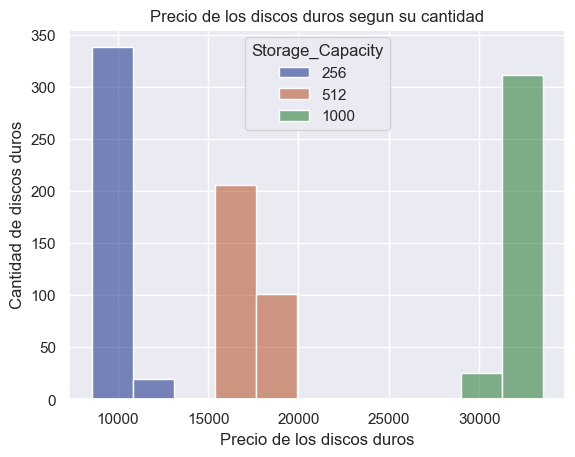

In [26]:
#GRAFICA DE PRECIO POR TAMAÑO DE DISCO DURO
sns.histplot(data=data_nueva, x='Price', hue='Storage_Capacity', palette='dark')
plt.title('Precio de los discos duros segun su cantidad')
plt.xlabel('Precio de los discos duros')
plt.ylabel('Cantidad de discos duros')
plt.show()

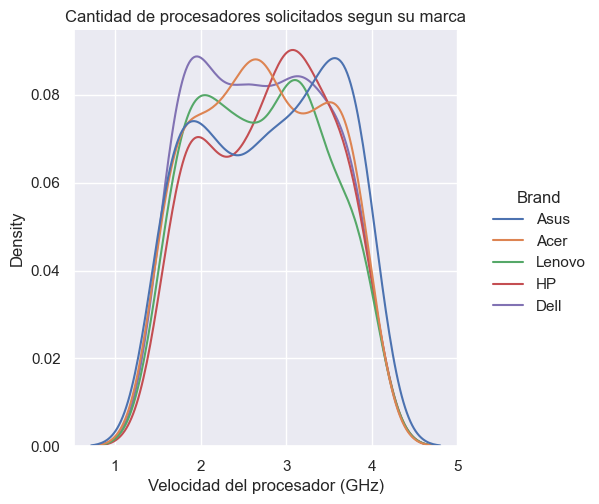

In [27]:
#GRAFICA DE PROCESADORES POR MARCA
#sns.displot(data=data_nueva, x='Processor_Speed', hue='Brand', kind='kde',fill=True, col='Brand')
sns.displot(data=data_nueva, x='Processor_Speed', hue='Brand', kind='kde')
plt.title('Cantidad de procesadores solicitados segun su marca')
plt.xlabel('Velocidad del procesador (GHz)')
plt.grid(True)
plt.show()

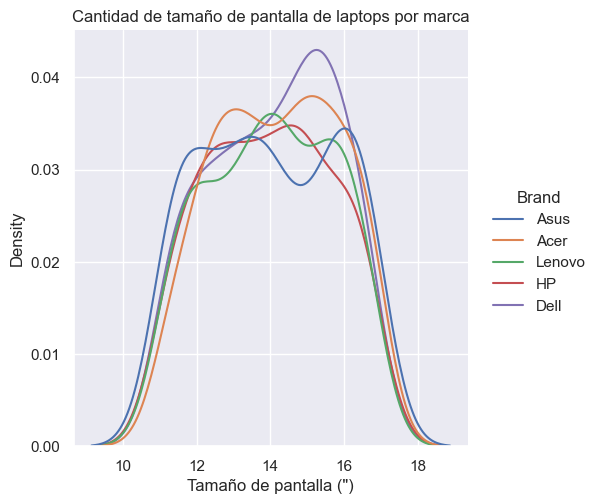

In [28]:
#GRAFICA DE TAMAÑO DE PANTALLA POR MARCA
#sns.displot(data=data_nueva, x='Screen_Size', hue='Brand', kind='kde', fill=True, bw_adjust=1,col='Brand')
sns.displot(data=data_nueva, x='Screen_Size', hue='Brand', kind='kde')
plt.title('Cantidad de tamaño de pantalla de laptops por marca')
plt.xlabel('Tamaño de pantalla (")')
plt.grid(True)
plt.show()

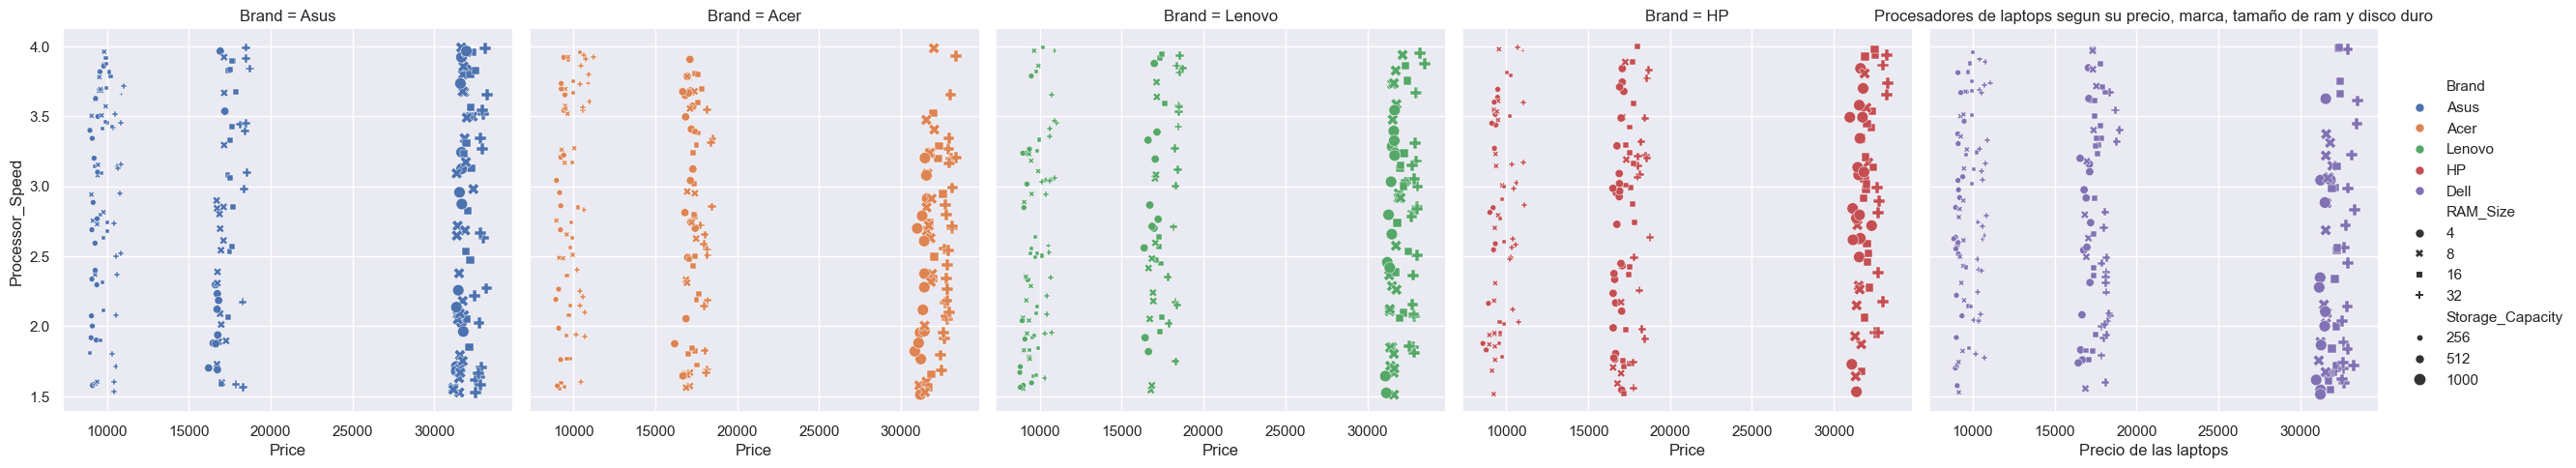

In [29]:
#GRAFICA DE PRECIO POR TAMAÑO DE DISCO SEGUN SU MARCA Y TAMAÑO DE RAM
sns.relplot(data=data_nueva, x='Price', y='Processor_Speed', hue='Brand', style='RAM_Size',
           size='Storage_Capacity', kind='scatter', col='Brand')
#plt.legend(loc='center', bbox_to_anchor=(1.22,0.5))
plt.title('Procesadores de laptops segun su precio, marca, tamaño de ram y disco duro')
plt.xlabel('Precio de las laptops')
plt.ylabel('Procesadores de las laptops')
plt.show()

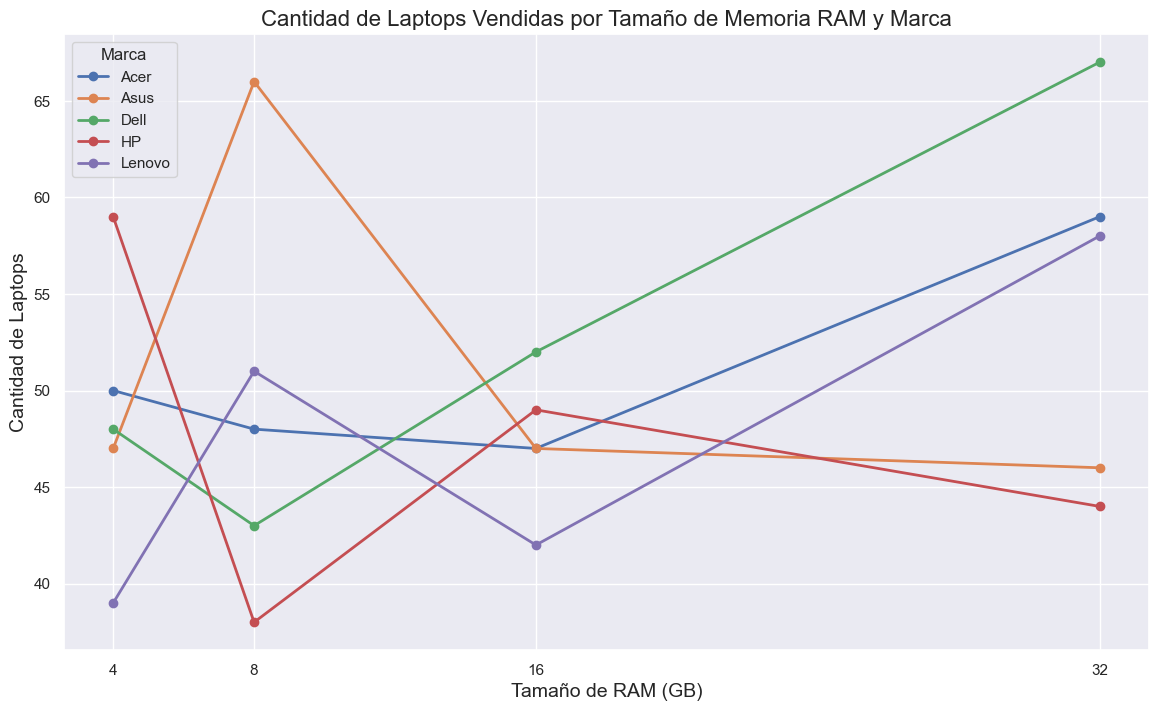

In [30]:
#GRAFICA DE LA AGRUPACION DE LA DATA POR MARCA Y MEMORIA RAM
plt.figure(figsize=(14, 8))
for brand in grouped_data['Brand'].unique():

    brand_data = grouped_data[grouped_data['Brand'] == brand]
    plt.plot(brand_data['RAM_Size'], brand_data['Count'], marker='o', linestyle='-', linewidth=2, label=brand)

plt.xlabel('Tamaño de RAM (GB)', fontsize=14)
plt.ylabel('Cantidad de Laptops', fontsize=14)
plt.title('Cantidad de Laptops Vendidas por Tamaño de Memoria RAM y Marca', fontsize=16)
plt.legend(title='Marca')
plt.grid(True)
plt.xticks(grouped_data['RAM_Size'].unique())  
plt.show()

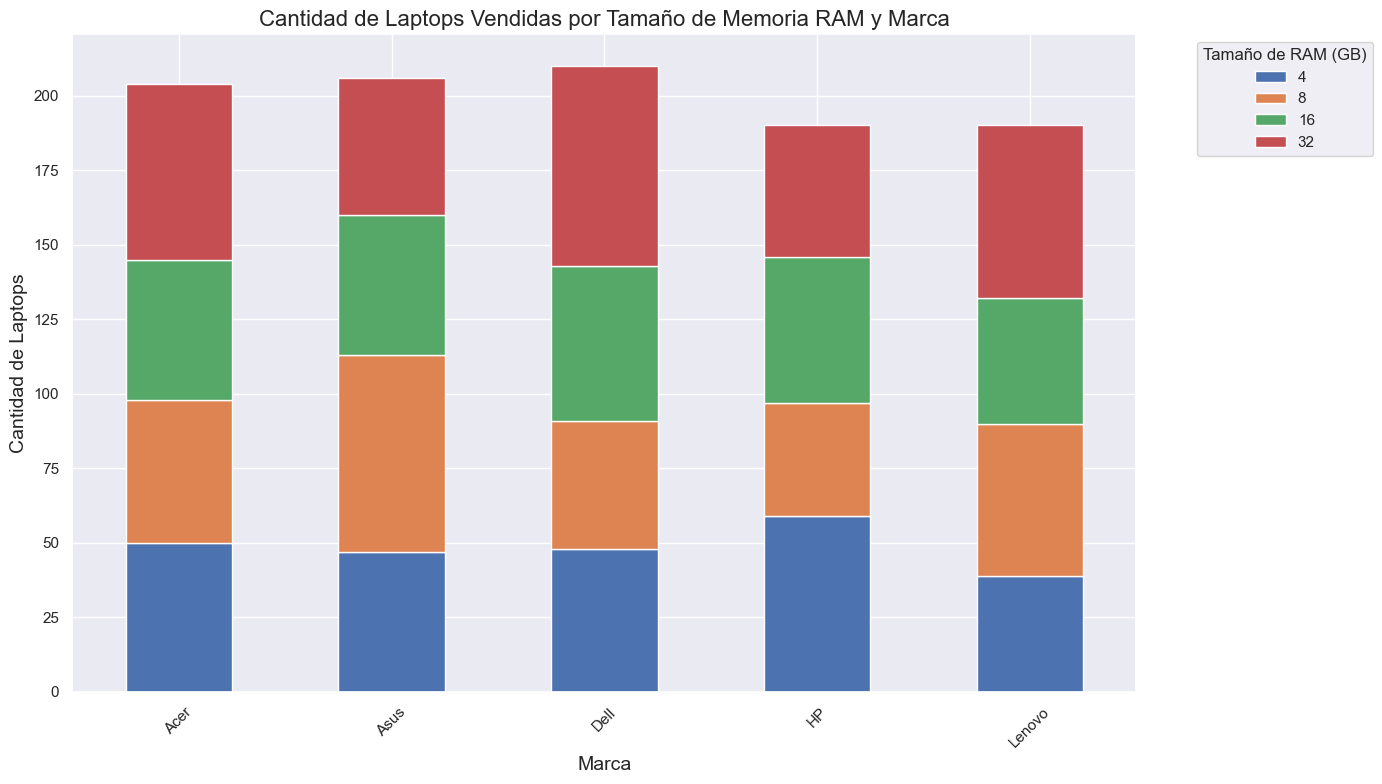

In [31]:
#MOSTRAR LA GRAFICA DE LA AGRUPACION DE LA RAM SEGUN SU MARCA
ram_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.xlabel('Marca', fontsize=14) 
plt.ylabel('Cantidad de Laptops', fontsize=14) 
plt.title('Cantidad de Laptops Vendidas por Tamaño de Memoria RAM y Marca', fontsize=16) 
plt.legend(title='Tamaño de RAM (GB)', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

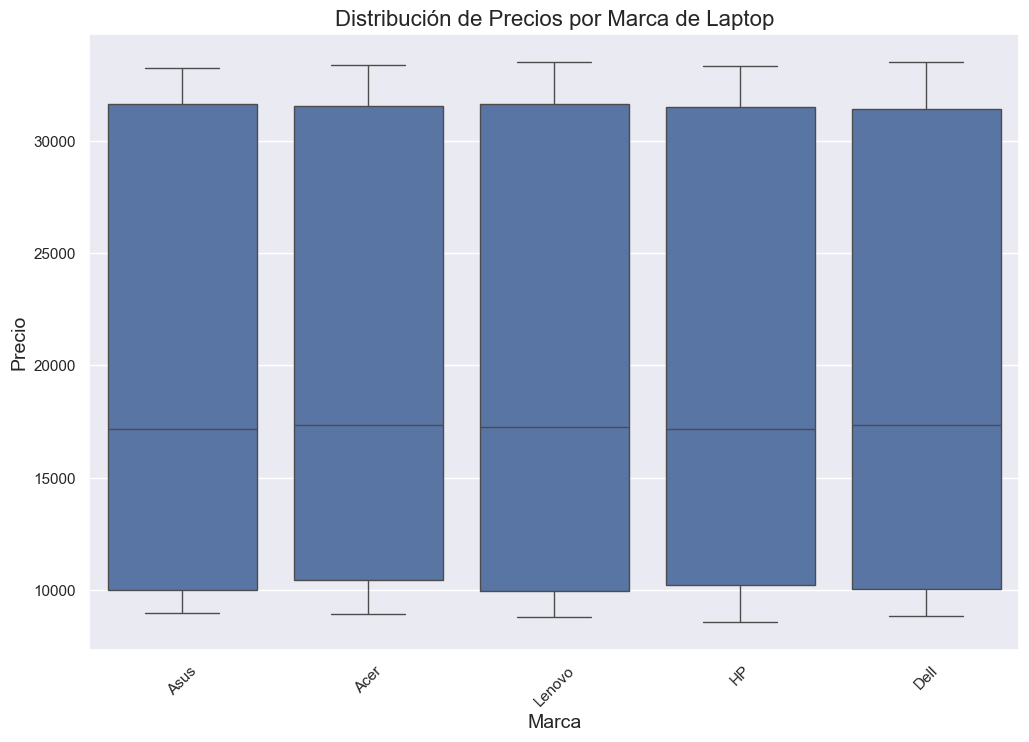

In [32]:
#GRAFICA DE DISTRIBUCION DE PRECIOS POR MARCA DE LAPTOPS
plt.figure(figsize=(12, 8))  
sns.boxplot(x='Brand', y='Price', data=data)  
plt.xticks(rotation=45)  
plt.xlabel('Marca', fontsize=14)  
plt.ylabel('Precio', fontsize=14)  
plt.title('Distribución de Precios por Marca de Laptop', fontsize=16)  
plt.show()

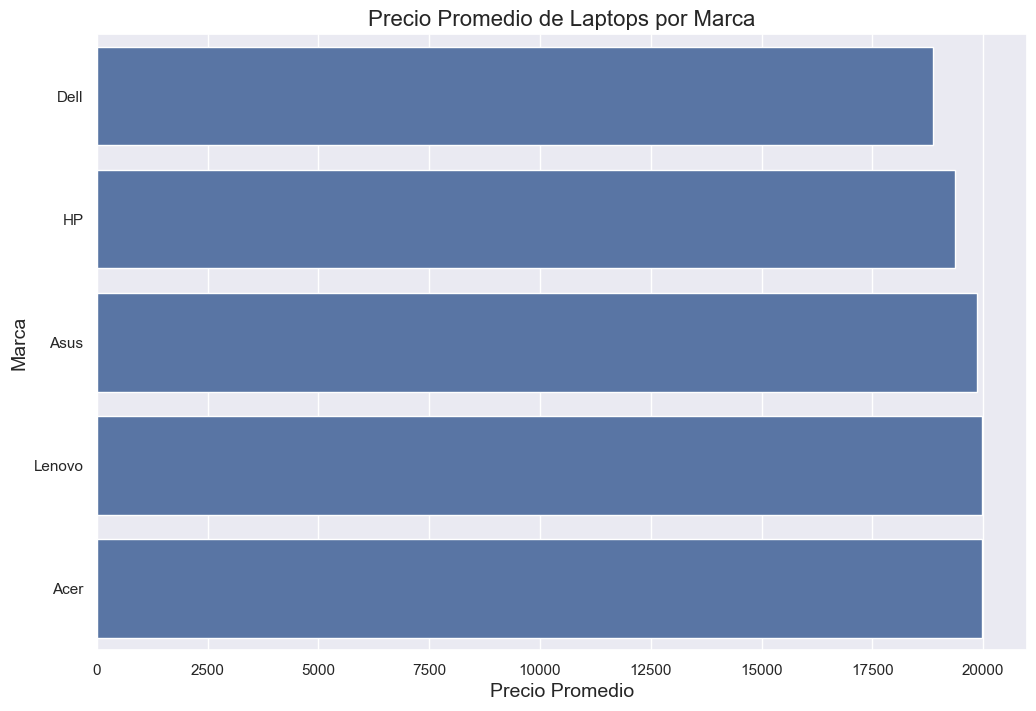

In [33]:
#GRAFICA DEL PROMEDIO DE PRECIO SEGUN SU MARCA
plt.figure(figsize=(12, 8))  
sns.barplot(x=average_price_by_brand.values, y=average_price_by_brand.index)  
plt.xlabel('Precio Promedio', fontsize=14)  
plt.ylabel('Marca', fontsize=14)  
plt.title('Precio Promedio de Laptops por Marca', fontsize=16)  # Título del gráfico
plt.show()

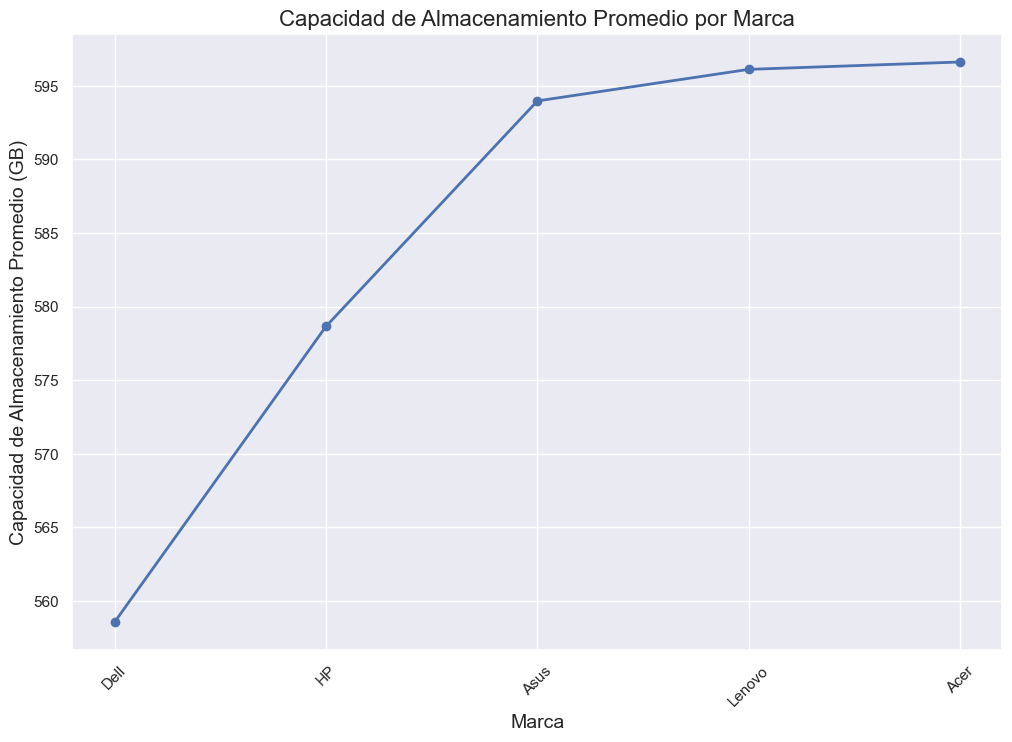

In [34]:
#GRAFICA DEL PROMEDIO DEL ALMACENAMIENTO POR MARCA
plt.figure(figsize=(12, 8))  
plt.plot(average_storage_by_brand, marker='o', linestyle='-', linewidth=2)  
plt.xticks(rotation=45)  
plt.xlabel('Marca', fontsize=14) 
plt.ylabel('Capacidad de Almacenamiento Promedio (GB)', fontsize=14) 
plt.title('Capacidad de Almacenamiento Promedio por Marca', fontsize=16)  
plt.grid(True) 
plt.show()

In [35]:
#DIAGRAMA DE CORRELACION
correlacion_diagrama = data_nueva.corr(numeric_only=True)
correlacion_diagrama

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
Processor_Speed,1.000000,0.021391,-0.067576,-0.013425,-0.054603,-0.050737
RAM_Size,0.021391,1.000000,0.002111,-0.036002,-0.025382,0.061237
Storage_Capacity,-0.067576,0.002111,1.000000,-0.027560,0.041335,0.997908
Screen_Size,-0.013425,-0.036002,-0.027560,1.000000,0.021995,-0.026740
Weight,-0.054603,-0.025382,0.041335,0.021995,1.000000,0.038417
Price,-0.050737,0.061237,0.997908,-0.026740,0.038417,1.000000


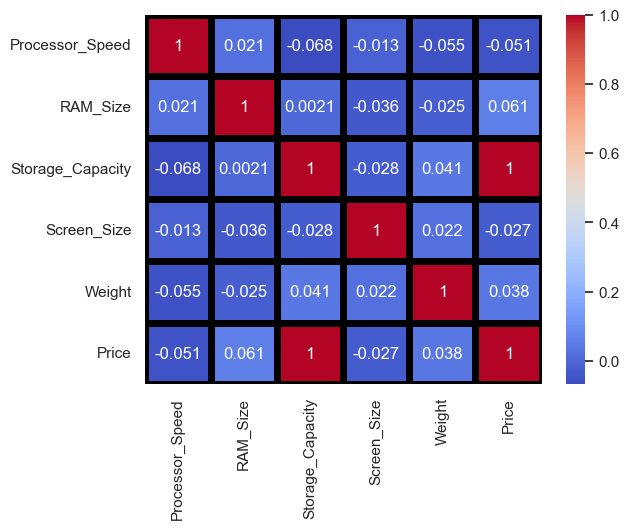

In [36]:
sns.heatmap(correlacion_diagrama, annot=True, cmap='coolwarm', linewidths=5, linecolor='black')
plt.show()

## Modelo de Entrenamiento(Train test split)

In [37]:
#Realizar el metodo de separacion de training - test
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data_nueva, test_size=0.2, random_state=1516)

In [38]:
#Validamos
train_set.shape

(800, 7)

In [39]:
test_set.shape

(200, 7)

In [64]:
data = pd.read_csv("Laptop_price.csv")

one_hot = pd.get_dummies(data['Brand'], prefix='Brand', dtype=int)

df = pd.concat([data, one_hot], axis=1)

df.drop('Brand', axis=1, inplace=True)

data=df.copy()



X = data.drop(['Price'],axis=1) # Características
y = data['Price']  # Etiqueta objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)  

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")


print(f"Error Cuadrático Medio (MSE): {mse_train}")
print(f"Coeficiente de Determinación (R^2): {r2_train}")

Error Cuadrático Medio (MSE): 36763.185423382354
Coeficiente de Determinación (R^2): 0.9995841432395483
Error Cuadrático Medio (MSE): 39117.44633440934
Coeficiente de Determinación (R^2): 0.9995573433572938


In [67]:
model = LinearRegression()
model.fit(X, y)

# Get feature importance (coefficients)
feature_importance = model.coef_

# Create DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

feature_importance_df

,Feature,Importance
0,Processor_Speed,198.861005
1,RAM_Size,50.472722
2,Storage_Capacity,29.976314
6,Brand_Asus,20.417831
3,Screen_Size,17.270985
5,Brand_Acer,6.169947
4,Weight,-6.505040
9,Brand_Lenovo,-6.965294
8,Brand_HP,-7.623435
7,Brand_Dell,-11.999049


In [73]:
val=feature_importance_df[feature_importance_df['Importance']>16]['Feature'].values

In [82]:
X = data[val]
y = data['Price']  # Etiqueta objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)  

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")


print(f"Error Cuadrático Medio (MSE): {mse_train}")
print(f"Coeficiente de Determinación (R^2): {r2_train}")

Error Cuadrático Medio (MSE): 31798.263523703994
Coeficiente de Determinación (R^2): 0.999649785556979
Error Cuadrático Medio (MSE): 39972.88835556084
Coeficiente de Determinación (R^2): 0.9995445826464647


In [83]:
from sklearn.model_selection import train_test_split, GridSearchCV
model = LinearRegression()

# Define hyperparameters to search
params = {'fit_intercept': [True, False]}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(model, params, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on test data
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

31798.263523703994